# Ejercicios ensembling
En este ejercicio vas a realizar prediciones sobre un dataset de ciudadanos indios diabéticos. Se trata de un problema de clasificación en el que intentaremos predecir 1 (diabético) 0 (no diabético).

### 1. Carga las librerias que consideres comunes al notebook

In [7]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns


### 2. Lee los datos de [esta direccion](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv)
Los nombres de columnas son:
```Python
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
```

In [3]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

df = pd.read_csv(url, names=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'])
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


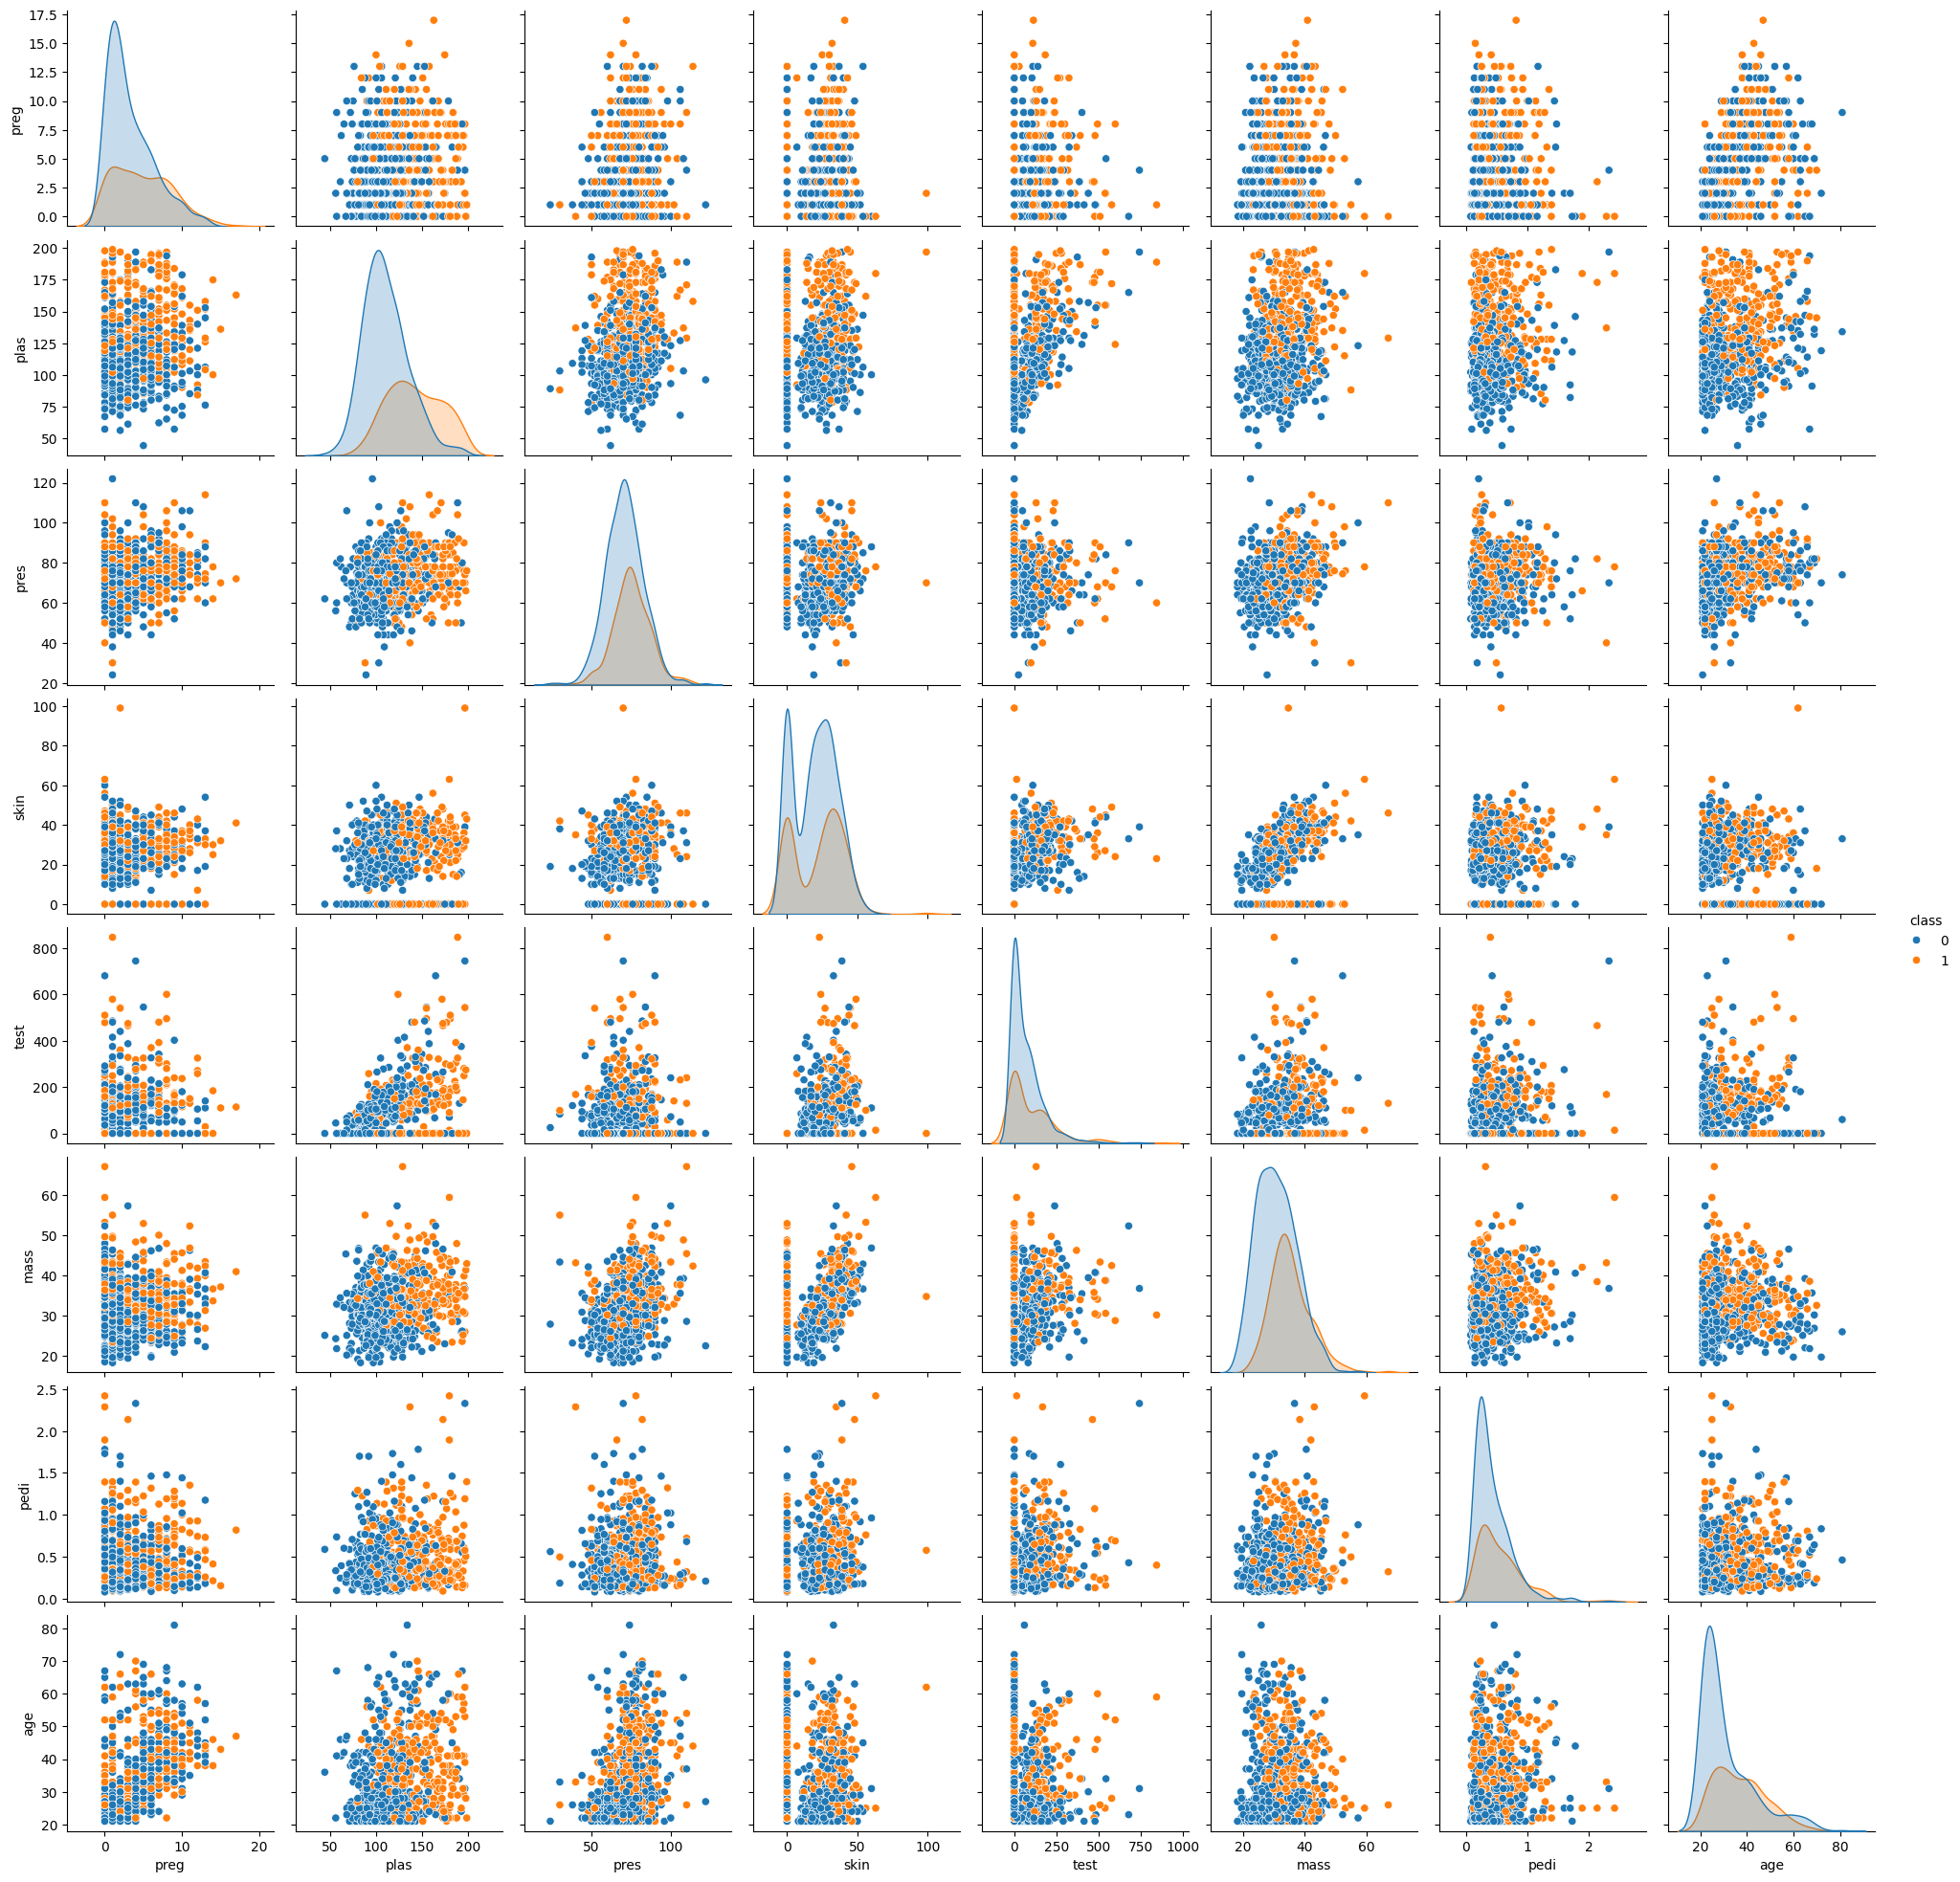

In [55]:
sns.pairplot(df, hue="class")

<Axes: >

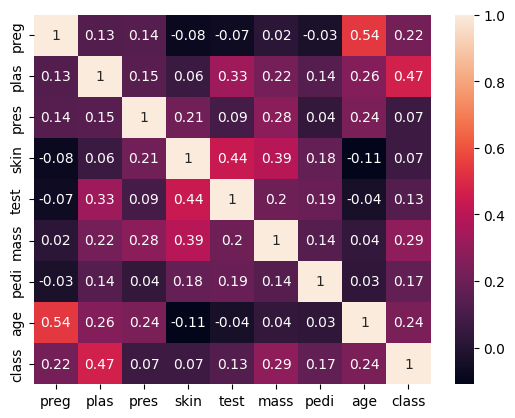

In [10]:
sns.heatmap(df.corr().round(2),annot=True)

In [14]:
'''
Me voy a cargar las columnas de test y skin dado que la mitad de sus datos son "ilogicos"
Para las columnas "plas" "pres" y "mass" voy a hacer la medaiana por "class" y rellenar esos valores que son 0
'''

(df == 0).sum()

preg     111
plas       0
pres       0
skin     227
test     374
mass       0
pedi       0
age        0
class    500
dtype: int64

In [12]:
# Columnas que vamos a imputar
cols_a_imputar = ['plas', 'pres', 'mass']

# Para cada columna...
for col in cols_a_imputar:
    for clase in [0, 1]:
        # Calcular la mediana solo para esa clase
        mediana = df[df['class'] == clase][col].replace(0, pd.NA).median()
        
        # Reemplazar ceros solo donde la clase coincida
        condicion = (df['class'] == clase) & (df[col] == 0)
        df.loc[condicion, col] = mediana

C:\Users\fer_r\AppData\Local\Temp\ipykernel_19316\2911590866.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '74.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[condicion, col] = mediana


In [15]:
x = df.drop(["class", "skin", "test"], axis=1)
y = df["class"]

### 3. Bagging
Para este apartado tendrás que crear un ensemble utilizando la técnica de bagging ([BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)), mediante la cual combinarás 100 [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Recuerda utilizar también [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) con 10 kfolds.

**Para este apartado y siguientes, no hace falta que dividas en train/test**, por hacerlo más sencillo. Simplemente divide tus datos en features y target.

Establece una semilla

In [36]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

estimator = DecisionTreeClassifier(max_depth=3,random_state=42)

baggin = BaggingClassifier(
    estimator = estimator,
    n_estimators=100, # Cantidad de árboles
    max_samples=0.8, # Cantidad de muestras que va a usar cada uno de los modelos que estamos usando. 
    bootstrap=True, # Usamos boostrapping: muestreo con reemplazo.
    # max_features = 3 # Features que utiliza en el boostrapping. Cuanto más bajo, mejor generalizará y menos overfitting
    random_state=42)

scores_bag = cross_val_score(baggin, x, y, cv=10, scoring='accuracy')

baggin.fit(x, y)
y_pred = baggin.predict(x)

print("Accuracy promedio:", scores_bag.mean())

accuracy_score(y, y_pred)

Accuracy promedio: 0.7656185919343815


0.7864583333333334

Coeficientes de correlacion mas altos

### 4. Random Forest
En este caso entrena un [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) con 100 árboles y un `max_features` de 3. También con validación cruzada

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

r_forest= RandomForestClassifier(n_estimators=10,
                                 max_features=3,
                                 max_leaf_nodes=16,
                                 random_state=42)

scores_rf = cross_val_score(r_forest, x, y, cv=10, scoring='accuracy')

r_forest.fit(x, y)

y_pred_rf = r_forest.predict(x)

print("Accuracy promedio:", scores_rf.mean())

accuracy_score(y, y_pred_rf)

Accuracy promedio: 0.7525803144224197


0.8502604166666666

### 5. AdaBoost
Implementa un [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) con 30 árboles.

In [28]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

estimator = DecisionTreeClassifier(max_depth=1, random_state=42)

adaboost = AdaBoostClassifier(estimator = estimator,
                             n_estimators=30,
                             learning_rate=0.5,
                             random_state=42)

scores_ada = cross_val_score(adaboost, x, y, cv=10, scoring='accuracy')

adaboost.fit(x, y)

y_pred = adaboost.predict(x)

print("Accuracy promedio:", scores_ada.mean())

accuracy_score(y, y_pred)

Accuracy promedio: 0.7578605604921395


0.7825520833333334

### 6. GradientBoosting
Implementa un [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) con 100 estimadores -->

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

gb = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

scores_gb = cross_val_score(gb, x, y, cv=10, scoring='accuracy')

print("Accuracy promedio:", scores_gb.mean())

accuracy_score(y, y_pred)

Accuracy promedio: 0.7551777170198223


0.7825520833333334

### 7. XGBoost
Para este apartado utiliza un [XGBoostClassifier](https://docs.getml.com/latest/api/getml.predictors.XGBoostClassifier.html) con 100 estimadores. XGBoost no forma parte de la suite de modelos de sklearn, por lo que tendrás que instalarlo con pip install

In [33]:
!pip install xgboost
!pip install lightgbm

In [34]:
import xgboost
from sklearn.model_selection import cross_val_score

xgb = xgboost.XGBClassifier(
    n_estimators=100,
    random_state=42
)

scores_xgb = cross_val_score(xgb, x, y, cv=10, scoring='accuracy')
xgb.fit(x, y)
y_pred = xgb.predict(x)

print("Accuracy promedio:", scores_xgb.mean())

accuracy_score(y, y_pred)

Accuracy promedio: 0.7356630211893369


1.0

### 8. Primeros resultados
Crea un dataframe con los resultados y sus algoritmos, ordenándolos de mayor a menor

In [37]:
# Creamos un diccionario con los resultados
resultados = {
    'Bagging': scores_bag.mean(),
    'Random Forest': scores_rf.mean(),
    'AdaBoost': scores_ada.mean(),
    'Gradient Boosting': scores_gb.mean(),
    'XGBoost': scores_xgb.mean()
}

# Lo convertimos en DataFrame
df_resultados = pd.DataFrame.from_dict(resultados, orient='index', columns=['Accuracy'])

# Lo ordenamos de mayor a menor
df_resultados = df_resultados.sort_values(by='Accuracy', ascending=False)

# Mostramos
df_resultados


,Accuracy
Bagging,0.765619
AdaBoost,0.757861
Gradient Boosting,0.755178
Random Forest,0.752580
XGBoost,0.735663


### 9. Hiperparametrización
Vuelve a entrenar los modelos de nuevo, pero esta vez dividiendo el conjunto de datos en train/test y utilizando un gridsearch para encontrar los mejores hiperparámetros.

In [38]:
from sklearn.model_selection import train_test_split

x = df.drop(["class", "skin", "test"], axis=1)
y = df["class"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


## Bagging

In [45]:
from sklearn.model_selection import GridSearchCV

estimator = DecisionTreeClassifier(max_depth=3,random_state=42)

param_grid = {'n_estimators':[10, 50, 100, 200],
              'max_samples':[0.5, 0.8, 1.0],
              }


baggin = BaggingClassifier(
    estimator = estimator,
    bootstrap=True,
    random_state=42)


grid_bagg = GridSearchCV(estimator=baggin, param_grid=param_grid, scoring='accuracy', cv=10)

grid_bagg.fit(x_train, y_train)
grid_bagg.best_params_

predictions_bagg = grid_bagg.predict(x_test)


print("Mejores hiperparámetros:", grid_bagg.best_params_)
print("Mejor accuracy en validación cruzada:", grid_bagg.best_score_)
print(accuracy_score(y_test, predictions_bagg))

Mejores hiperparámetros: {'max_samples': 0.8, 'n_estimators': 100}
Mejor accuracy en validación cruzada: 0.7718667371760973
0.7597402597402597


## Random Forest

In [46]:
param_grid = {'n_estimators':[10, 50, 100, 200],
              'max_samples':[0.5, 0.8, 1.0],
              'max_features':[2,3,4]
              }

r_forest= RandomForestClassifier(random_state=42)

grid_forest = GridSearchCV(estimator=r_forest, param_grid=param_grid, scoring='accuracy', cv=10)

grid_forest.fit(x_train, y_train)

predictions_fore = grid_forest.predict(x_test)

print("Mejores hiperparámetros:", grid_forest.best_params_)
print("Mejor accuracy en validación cruzada:", grid_forest.best_score_)
print(accuracy_score(y_test, predictions_fore))

Mejores hiperparámetros: {'max_features': 2, 'max_samples': 0.5, 'n_estimators': 50}
Mejor accuracy en validación cruzada: 0.7800898995240615
0.8051948051948052


## AdaBoost

In [51]:
param_grid = {'n_estimators':[10, 50, 100, 200],
              'learning_rate':[0.1, 0.5, 0.01]
              }

adaboost= AdaBoostClassifier(random_state=42)

grid_adaboost = GridSearchCV(estimator=adaboost, param_grid=param_grid, scoring='accuracy', cv=10)

grid_adaboost.fit(x_train, y_train)

predictions_ada = grid_adaboost.predict(x_test)

print("Mejores hiperparámetros:", grid_adaboost.best_params_)
print("Mejor accuracy en validación cruzada:", grid_adaboost.best_score_)
print(accuracy_score(y_test, predictions_ada))

Mejores hiperparámetros: {'learning_rate': 0.5, 'n_estimators': 100}
Mejor accuracy en validación cruzada: 0.7767847699629825
0.7662337662337663


## GradientBoosting

In [52]:
param_grid = {'n_estimators':[10, 50, 100, 200],
              'learning_rate':[0.1, 0.5, 0.01],
              'max_depth':[2,3,4]
              }

gradboost= GradientBoostingClassifier(random_state=42)

grid_gradiant_boosting = GridSearchCV(estimator=gradboost, param_grid=param_grid, scoring='accuracy', cv=10)

grid_gradiant_boosting.fit(x_train, y_train)

predictions_gradbost = grid_gradiant_boosting.predict(x_test)

print("Mejores hiperparámetros:", grid_gradiant_boosting.best_params_)
print("Mejor accuracy en validación cruzada:", grid_gradiant_boosting.best_score_)
print(accuracy_score(y_test, predictions_gradbost))

Mejores hiperparámetros: {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 10}
Mejor accuracy en validación cruzada: 0.7750925436277103
0.7532467532467533


## XGBost

In [53]:
param_grid = {'n_estimators':[10, 50, 100, 200],
              'learning_rate':[0.1, 0.5, 0.01],
              'max_depth':[2,3,4]
              }

xgboost= xgboost.XGBClassifier(random_state=42)

grid_xgboost = GridSearchCV(estimator=xgboost, param_grid=param_grid, scoring='accuracy', cv=10)

grid_xgboost.fit(x_train, y_train)

predictions_xgboost = grid_xgboost.predict(x_test)

print("Mejores hiperparámetros:", grid_xgboost.best_params_)
print("Mejor accuracy en validación cruzada:", grid_xgboost.best_score_)
print(accuracy_score(y_test, predictions_xgboost))

Mejores hiperparámetros: {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 10}
Mejor accuracy en validación cruzada: 0.7913537810682179
0.7727272727272727


### 10. Conclusiones finales

El modelo elegido es el RF hiperparametrizado, que es el que mejor accuracy ha obtenido ante test, es decir, el que mejor generaliza.